# **Everything Counts: Assigment 2**

*This assessment: **(1)** evaluates the ability to conduct motivated hypothesis testing on a dataset, which can be the same as the Assessment #1 dataset, or another; and **(2)** awareness of how datasets can conceal bias or misrepresent a phenomenon.*

https://github.com/najidreh/assignment2-covid-matches.git

# Premier League 2020-2022



***(0)*** *Assist: imports from Assignment 1*

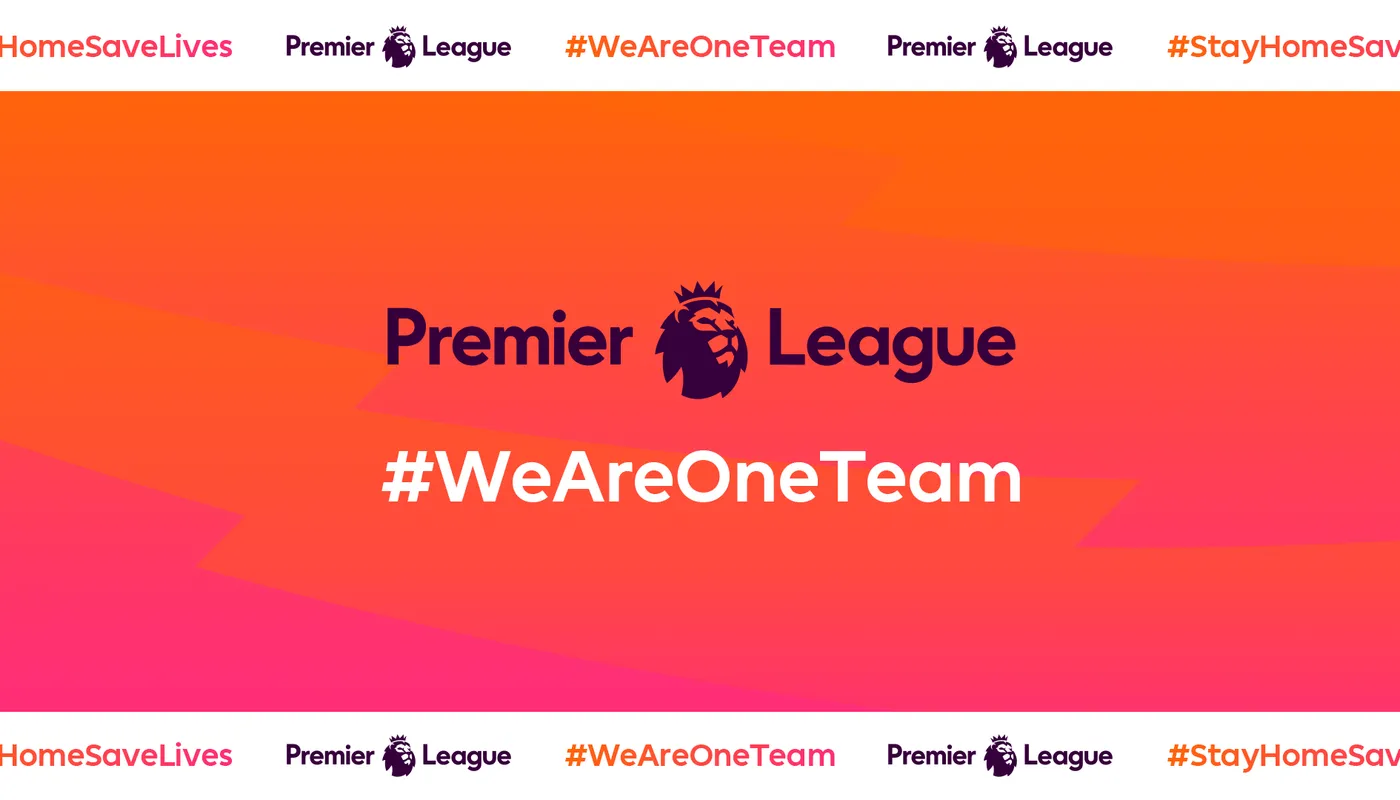

In [32]:
# connect to GitHub repository and retrieve same dataset
!apt-get install -y git
!git config --global user.email "najid.rehman@lis.ac.uk"
!git config --global user.name "najidreh"
!git clone https://github.com/najidreh/assignment1-covid-matches

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.12).
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
Cloning into 'assignment1-covid-matches'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 18 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (18/18), 847.02 KiB | 5.50 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [33]:
# change directory
%cd assignment1-covid-matches/

/content/assignment1-covid-matches/assignment1-covid-matches


In [34]:
# double check
%ls

 covid-matches-dataset.csv  'everything_counts_assignment_1(2).ipynb'


In [35]:
# import useful libraries
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# reading dataset
# call dataset df_cm for data-frame_covid-matches
df_cm = pd.read_csv('covid-matches-dataset.csv')

The same dataset was collected from Kaggle: https://www.kaggle.com/datasets/elnahas/premier-league-20202022 from match statistics in the Premier League between 2020 and 2022.

The continued problem topic at hand is the affect of the covid-19 pandemic on both sporting final results and the underlying data, specifically Premier League football where fan attendance in stadiums was prohibited in the 20/21 season but resumed from 21/22.

As we know, the raw data contains 1,389 entries with 28 characteristic columns.

In [37]:
# remove the following columns for our data-frame_covid-matches_clean
df_cm_clean = df_cm.drop(columns=['Unnamed: 0', 'notes', 'comp', 'formation', 'match report'], errors='ignore')

In [38]:
# create new column for total goals in game, using the sum of gf and ga
df_cm_clean['tg'] = df_cm_clean['gf'] + df_cm_clean['ga']
df_cm_clean['gdif'] = abs(df_cm_clean['gf'] - df_cm_clean['ga'])

In [39]:
# create new column for result Home win, Away win, or Draw aka HAD
# use gf and ga to determine as if gf is greater than ga, the Home team has won and vice versa, else draw
def determine_result(row):
    if row['gf'] > row['ga']:
        return 'Home'
    elif row['gf'] < row['ga']:
        return 'Away'
    else:
        return 'Draw'

# create a new column using pandas apply function that applies determine_result function along rows of dataset
df_cm_clean['HAD'] = df_cm_clean.apply(determine_result, axis=1)


In [40]:
# dist is missing one data entry so fill in with median of all other dist entries
df_cm_clean['dist'] = df_cm_clean['dist'].fillna(df_cm_clean['dist'].median())
# meticulous

In [41]:
# rename improve readability
df_cm = df_cm_clean

In [42]:
# separate data for no fans in stadiums aka null
null_df_cm = df_cm_clean[df_cm_clean['attendance'].isnull()]

# rename for ease
n_dfcm = null_df_cm

In [43]:
# separate data for fans in stadiums aka non_null
non_null_df_cm = df_cm_clean[df_cm_clean['attendance'].notnull()]

# rename for ease
nn_dfcm = non_null_df_cm

***(1):*** *Motivation: key takeaways from Assignment 1*

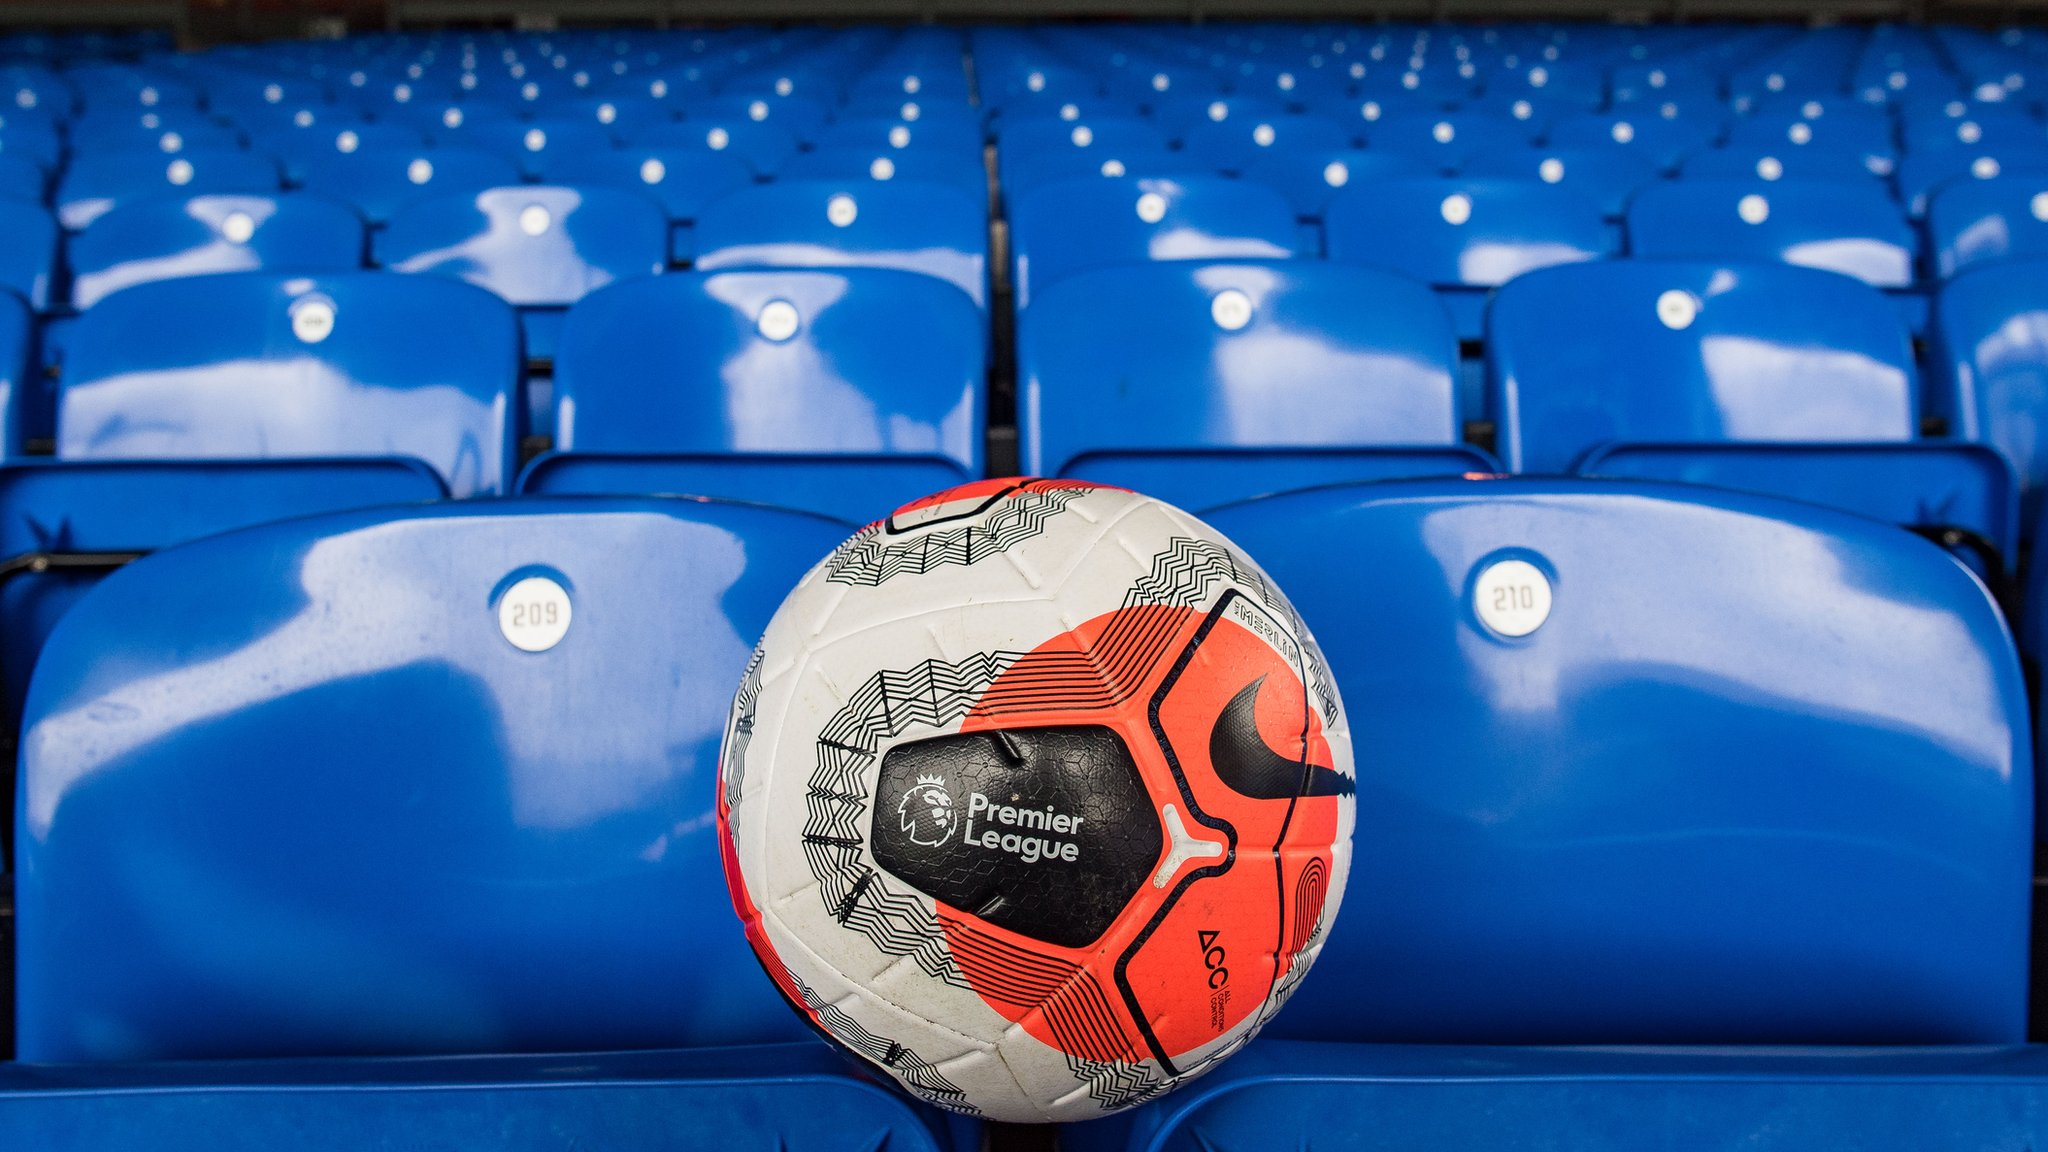

The narrative around the colloquial "covid season" of 20/21 was that the game is nothing without fans. Our initial exploration looked at every match in that year with no fan attendance in contrast to the following season where fans were allowed back. In order to hypothesise, we will now lay out what I expected before the data (xR) and my reasoning (r) vs the data results I drew (R).

- xR: Players will perform better in shooting metrics without fan attendance.
- r: Without fans there is less pressure and players will play closer to their elite training performance levels.
- R: Data shows players overperform their xG more with fan attendance.


- xR: Scorelines will be higher without fan attendance.
- r: The novelty and training-like matches will throw more high scoring freak results.
- R: Data shows match total goals were positively skewed with and without fans. There were also more 0-0 draws with fans than without.

- xR: Home teams will have a lower win percentage without fans.
- r: Without the home support, Home teams will surrender their positive advantage and opposition intimidation.
- R: Data shows Home teams had a higher win percentage without fans.

- xR: Home teams will have lower possession without fan attendace.
- r: The narrative in football is home fans expect their team to play a more possession based game when at Home.
- R: Data shows median Home team possession was slightly higher without fan attendance.

- xR: Home teams will get less penalties awarded without fan attendance.
- r: Home fans seem to put pressure on referees which may influence their decisions in favour.
- R: Data shows Home team mean penalties awarded was higher without fan attendance.

**Significant or not significant: that is the question**

While the data are showing interesting results which go against popular football narrative by the eye-test, we must now test whether these results are statistically significant or not through Hypothesis Testing.


---



---



# Our First Hypothesis

---



---



Our first hypothesis test is drawn from our assignment 1 pie chart data visualisation. This showed HAD (whether the Home team won, the Away team won, or it was a Draw). While there was a difference with and without fans, I want to see if this was a statistically significant result. Our alternative and null hypothesis are as follows:

- **H1:** There is a real difference in average Home wins, Away wins, or Draws without fans
- **H0:** There is no real difference in average Home wins, Away wins, or Draws without fans

*We are going to anchor both our hypothesis on data without fans as that is the rare event case we want to measure our results against.*

In [44]:
# HAD is our metric which states home win, away win, or draw for every match

# for null dataset aka no fans
had_n = n_dfcm['HAD'].value_counts()
print(had_n)

# for non null data set aka yes fans
had_nn = nn_dfcm['HAD'].value_counts()
print(had_nn)

HAD
Home    269
Away    269
Draw    158
Name: count, dtype: int64
HAD
Away    279
Home    257
Draw    157
Name: count, dtype: int64


There are 696 HAD results without fans and 693 HAD results with fans. This is a fairly well balanced dataset to test as a difference of only 3 cases is negligible and should not be biased. And n ~ 700 per group is large enough for most hypothesis tests including Chi-Square tests.

In [45]:
# HAD with fans
home_nn = len(nn_dfcm[nn_dfcm['HAD']=='Home'])
away_nn = len(nn_dfcm[nn_dfcm['HAD']=='Away'])
draw_nn = len(nn_dfcm[nn_dfcm['HAD']=='Draw'])

# HAD no fans
home_n = len(n_dfcm[n_dfcm['HAD']=='Home'])
away_n = len(n_dfcm[n_dfcm['HAD']=='Away'])
draw_n = len(n_dfcm[n_dfcm['HAD']=='Draw'])

In [46]:
had_counts = [[home_nn, away_nn, draw_nn],[home_n, away_n, draw_n]]

# new import for Chi-Square tests
import scipy.stats as stats

# perform the Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(had_counts)

print("\nChi-Square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)  # Useful to check assumptions

# interpretation, significance level, and result

alpha = 0.05
if p < alpha:
    print("The results are statistically significant. Reject the null hypothesis and accept the alternative hypothesis.")
else:
    print("The results are not statistically significant. Reject the alternative hypothesis and accept the null hypothesis")


Chi-Square statistic: 0.4529432448270083
P-value: 0.7973419686326271
Degrees of freedom: 2
Expected frequencies:
 [[262.43196544 273.40820734 157.15982721]
 [263.56803456 274.59179266 157.84017279]]
The results are not statistically significant. Reject the alternative hypothesis and accept the null hypothesis


Since the P-value of ~0.80 is well over 0.05, there is not strong enough evidence to reject the null hypothesis and so there is no statistically significant association between fans attending and the result of Home wins, Away wins, or Draws over a season. The Expected frequencies are close to the actual count, which suggests no major deviations, and any differences are likely due to chance rather than a meaningful pattern.

However, while the 21/22 season had fans back in stadiums, there was still covid-19 apprehension within football, which may have meant not all regular fans returned so the antmosphere was less akin to say the 18/19 season prior, which may have been a better dataset to compare.

---



---



# Our Second Hypothesis

---



---



Our second hypothesis is from our total goals per game observation where there were 18 more 0-0 when there were no fans in the stadium compared to without fans. So from 696 games without fans there were 60 0-0 draws, and from 693 games with fans returning there only 42 0-0 draws. So a noticeable difference with the eye-test but is it statistically significant?

- **H2:** There is a real difference in the number of games ending as 0-0 without fans
- **H0:** There is no real difference in the number of games ending as 0-0 without fans

In [47]:
# count with len, separating null and non_null segments
nilnil_n = len(n_dfcm[n_dfcm['tg']==0])
nilnil_nn = len(nn_dfcm[nn_dfcm['tg']==0])

n_totalgames = len(n_dfcm)
nn_totalgames = len(nn_dfcm)

print(nilnil_n, nilnil_nn)

60 42


In [48]:
# lets import the two-proportion z-test
from statsmodels.stats.proportion import proportions_ztest
stat, p_value = proportions_ztest([nilnil_n, nilnil_nn],[n_totalgames, nn_totalgames])

# print results
print("Z-statistic:", stat)
print("P-value:", p_value)

if p_value < 0.05:
    print("The proportion of 0-0 games is significantly different.")
else:
    print("The proportion of 0-0 games is not significantly different.")

Z-statistic: 1.828888155292728
P-value: 0.06741636500547699
The proportion of 0-0 games is not significantly different.


The Z-statistic here suggests a difference between the frequency of 0-0 draws with and without fans, albeit a small one, but one which is not strong enough. The P-value of ~0.067 is small but still slightly above our 0.05 threshold, meaning there is not enough evidence to reject the null hypothesis with this structure.

***(2)*** *Awareness: of datasets and bias*

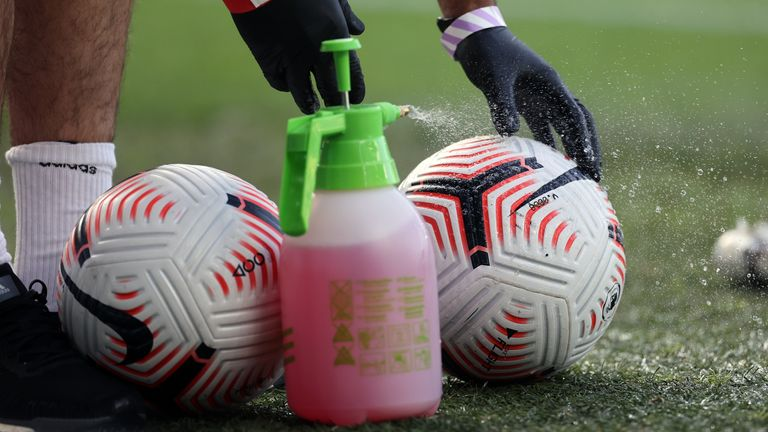

However, is it worth us revisiting this analysis with a significance level of 0.1 instead of 0.05? Because despite the impression created by countless research papers, lecture courses and textbooks, p-values below 0.05 do not “prove” the reality of anything (Matthews, 2021).

Diez, Çetinkaya-Rundel, and Barr (2022, Chapter 14) also discuss decision errors in hypothesis testing. Because there are only 2 seasons worth of data to compare and the increased risk of a Type I error does not have major consequences in this type of trial, i.e. non-medical and non-legal.

Changing the P-value threshold to 0.1 can therefore be justified in an early stage exploratory study, where we treat the data as suggestive rather than conclusive.

In [49]:
# lets try that again
from statsmodels.stats.proportion import proportions_ztest
stat, p_value = proportions_ztest([nilnil_n, nilnil_nn],[n_totalgames, nn_totalgames])

# print results
print("Z-statistic:", stat)
print("P-value:", p_value)

# new p-value of 0.1 instead of 0.05
if p_value < 0.1:
    print("The proportion of 0-0 games is significantly different.")
else:
    print("The proportion of 0-0 games is not significantly different.")

Z-statistic: 1.828888155292728
P-value: 0.06741636500547699
The proportion of 0-0 games is significantly different.


Wow! We now have our first statistically significant result!

At the 10% level, we can reject H0 and conclude that the proportion of 0-0 games with and without fans is statistically significant. This suggests fans returning induced greater stalemates without goals, maybe because the atmosphere created can be more anxiety inducing than motivating?

But we must remember we have moved the goalposts here to achieve it, even if we think it is justifiable.

---



---



# Third Hypothesis

---



---



From our previous statistically significant finding we now wonder whether we can test for this potentially anxious atmosphere created by fans and its affect on player performance. Whilst our HAD test was not statistically significant, in light of our latest findings is there a disparity between Home and Away teams' in game performance outputs with and without fans?

- **H3:** There is a real difference in the performance disparity between Home and Away teams without fans
- **H0:** There is no real difference in the performance disparity between Home and Aaway teams without fans

We will therefore create our own underlying metric to measure this.

So, xPD measures the Performance Disparity on a particular matchday between the Home and Away side.

This provides an estimate on how probable the match is to end in a draw based on how close the underlying possession and shooting metrics are.

In [50]:
# create xPD by combining total xg, total goals, and the possession difference between both sides.
xPD = ((df_cm['xg'] - df_cm['xga']).abs()) * ((df_cm['gf'] - df_cm['ga']).abs()) * ((df_cm['poss'] - (100 - df_cm['poss'])).abs())
print(xPD)

0         0.0
1        14.4
2        48.0
3         0.0
4        14.4
        ...  
1384      0.0
1385      8.4
1386    148.8
1387      0.0
1388      0.0
Length: 1389, dtype: float64


In [51]:
# include in dataframe
df_cm['xPD'] = xPD

In [52]:
# separate data for no fans in stadiums aka null and same section of dataset accordingly
null_df_cm = df_cm[df_cm['attendance'].isnull()]

# rename for ease
n_dfcm = null_df_cm

In [53]:
# separate data for fans in stadiums aka non_null and same section of dataset accordingly
non_null_df_cm = df_cm[df_cm['attendance'].notnull()]

# rename for ease
nn_dfcm = non_null_df_cm

We now want to visualise our new xPD metric against tg just to see it in action.

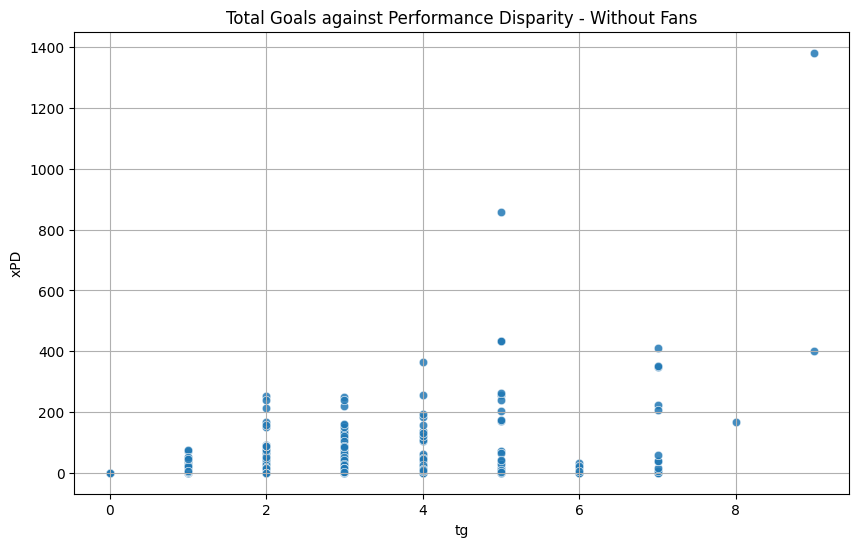

In [54]:
# scatter plot function for visualisation
def create_scatter_plot(x, y, xlabel, ylabel, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x, y=y, alpha=0.6)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.show()

# plot and label for n_dfcm
create_scatter_plot(n_dfcm['tg'], n_dfcm['xPD'], 'tg', 'xPD', 'Total Goals against Performance Disparity - Without Fans')


There does not seem to be a strong correlation between xPD and tg, without fans.

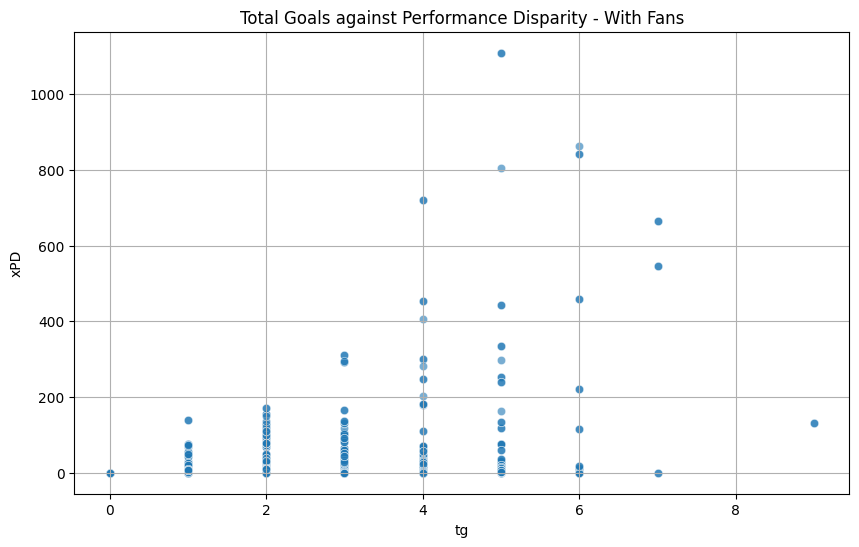

In [55]:
# repeat for nn_dfcm
def create_scatter_plot(x, y, xlabel, ylabel, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x, y=y, alpha=0.6)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.show()

create_scatter_plot(nn_dfcm['tg'], nn_dfcm['xPD'], 'tg', 'xPD', 'Total Goals against Performance Disparity - With Fans')

Neither does there seem to be a strong correlation between xPD and tg, with fans.

But lets add a regression line anyway to be thorough.

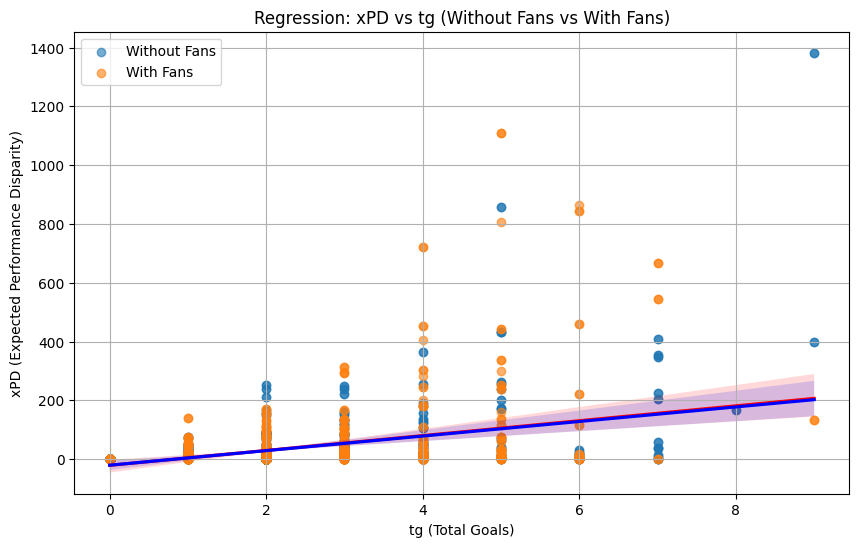

In [56]:
# visualise regression in comparison
plt.figure(figsize=(10, 6))
sns.regplot(x=n_dfcm['tg'], y=n_dfcm['xPD'], scatter_kws={'alpha':0.6}, line_kws={'color': 'red'}, label="Without Fans")

sns.regplot(x=nn_dfcm['tg'], y=nn_dfcm['xPD'], scatter_kws={'alpha':0.6}, line_kws={'color': 'blue'}, label="With Fans")

plt.xlabel("tg (Total Goals)")
plt.ylabel("xPD (Expected Performance Disparity)")
plt.title("Regression: xPD vs tg (Without Fans vs With Fans)")
plt.legend()
plt.grid(True)
plt.show()

The regression line is positively sloped, meaning as Total Goals in a game increases so does the Performance Disparity between the Home and Away teams. This aligns with intuitions as in higher scoring games, it is less likely to be a draw as one teams 'runs away with it'.

The blue line, 'Without Fans' has a slightly more stable trend, which suggests a more predictable relationship between xPD and tg compared to when fans returned suggesting fans may in fact affect Performance Disparity between Home and Away sides.


In [57]:
# so let's segment dataframe with no fans and with fans for xPD
n_xPD = n_dfcm['xPD']
nn_xPD = nn_dfcm['xPD']

In [58]:
# import for hypothesis test
from scipy.stats import ttest_ind

# perform independent t-test for xPD with no fans and with fans
# set equal_var=False for Welch's t-test
t_stat, p_value = ttest_ind(n_xPD, nn_xPD, equal_var=False)

# print results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# interpret the result at 10%
if p_value < 0.1:
    print("There is a significant difference in performance disparity between games with and without fans.")
else:
    print("There is no significant difference in performance disparity between games with and without fans.")


T-statistic: -0.10146114756808634
P-value: 0.919199175253815
There is no significant difference in performance disparity between games with and without fans.


Whilst we have not found a statistical significance here, we must be careful in our creation which could be accused of being a Statistical Golem. Critics may argue that xPD is a limiting metric, was created with the purpose of trying to reject the null hypothesis, and the relationship between the research and test is not clear (McElreath, 2023, 17:52–23:35).

---



---



# Fourth and Final Hypothesis

---



---



So, from our tests we can infer that football games and football teams were not greatly impacted by the 'covid season' in terms of output. This can be understood with the idea that highly trained athletes have a level of immunity to external factors when it comes to performance levels.

But, footballers have in the past complained about Kick Off times which affect their eating pattern and circadian rhythm. Can we find something here by reframing our xPD metric against time?

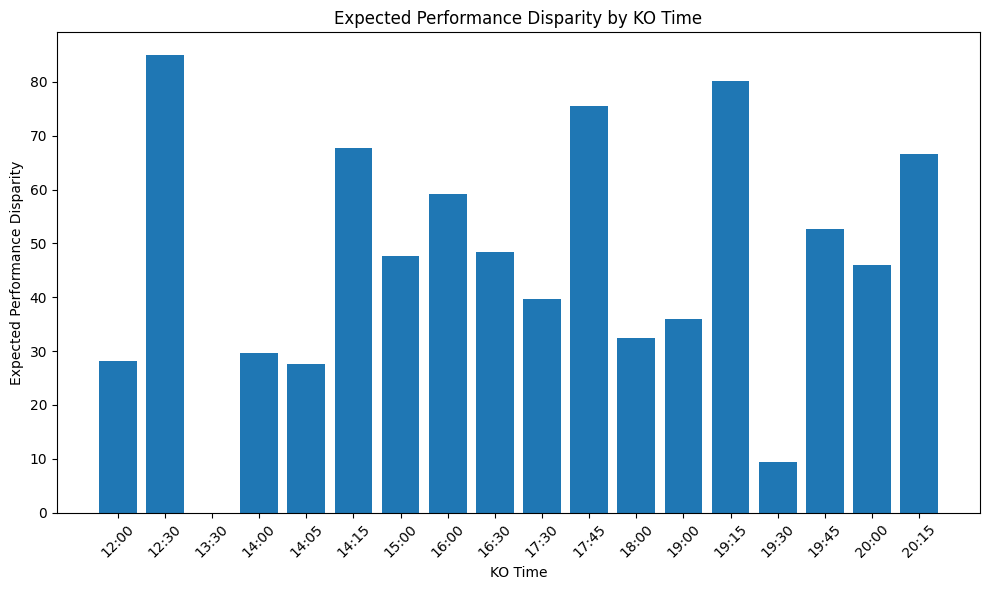

In [59]:
# Calculate the xPD for each time
xPDt = df_cm.groupby('time')['xPD'].mean()

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(xPDt.index.astype(str), xPDt.values)
plt.xlabel("KO Time")
plt.ylabel("Expected Performance Disparity")
plt.title("Expected Performance Disparity by KO Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The eye test here does not suggest an obvious trend, except 13:30 and 19:30 scoring much lower in xPD. But this may be an anomaly, as some times are repeated much more than others.

In [60]:
df_cm['time'].value_counts(ascending=True)


time
17:45      2
13:30      2
14:05     10
14:15     16
19:00     20
16:00     22
19:15     38
19:45     38
19:30     42
12:00     50
20:15     76
18:00     88
16:30     98
12:30    114
17:30    127
14:00    147
20:00    213
15:00    286
Name: count, dtype: int64

Times with less than 98 counts are not common KO times. Our intuition leads us to compare 12:30 KO times with non_12:30 as footballers in the past have referenced the early KO as a difficult adaptation i.e. less recovery time and having to eat pasta or alternative complex carbs for breakfast. Let's test if this early KO affects xPD.

- **H4:** There is a real difference in expected performance disparity between 12:30 and non-12:30 times
- **H0:** There is no real difference in expected performance disparity between 12:30 and non-12:30 times

In [61]:
# segment dataframe for 12:30 time is true
df_cm['is_12:30'] = df_cm['time'] == '12:30'

# apply xPD to create xPDt for time 12:30 and non 12:30
xPDt_1230pm = df_cm[df_cm['is_12:30']]['xPD']
xPDt_non_1230pm = df_cm[~df_cm['is_12:30']]['xPD']


t_stat, p_value = stats.ttest_ind(xPDt_1230pm, xPDt_non_1230pm, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# interpret result at 5% level for statistical rigour
if p_value < 0.05:
    print(f"There is a statistically significant difference in expected performance disparity between 12:30 and non-12:30 kick off times (p < {alpha}).")
else:
    print(f"There is no statistically significant difference in expected performance disparity between 12:30 and non-12:30 kick off times (p >= {alpha}).")

T-statistic: 2.2886020187515554
P-value: 0.023856009292457778
There is a statistically significant difference in expected performance disparity between 12:30 and non-12:30 kick off times (p < 0.05).


Wow! We have found a statistically significant result at p < 0.05 !

This reinforces our hunch that footballers are more susceptible to internal 'body' factors than external 'noise'. This was not our initial direction but an interesting find nonetheless.

McElreath (2023) may accuse us of being like colleagues at his own institute who justify design-inappropriate analysis because it was the one that gave them a smaller p-value because the goal must never be the criterion as this can mean the dataset has concealed bias or misrepresented a phenomenon. But, in the same breath, he also asks "What are they supposed to do?"

# Bibliography

Diez, D. M., Çetinkaya-Rundel, M., & Barr, C. D. (2022). Introduction to modern statistics (2nd ed., Chapter 14: Decision Errors). OpenIntro. Retrieved from https://openintro-ims.netlify.app/foundations-errors

Matthews, R. (2021). The p-value statement, five years on. Significance, 18(2), 16–19. https://doi.org/10.1111/1740-9713.01505

McElreath, R. (2023, January). Statistical Rethinking 2023 - 01 - The Golem of Prague [Video]. YouTube. Available at 17:52–23:35. https://www.youtube.com/watch?v=FdnMWdICdRs&t=1339s

McElreath, R. (2023, July 17). None of the above. Elements of Evolutionary Anthropology. Retrieved from https://elevanth.org/blog/2023/07/17/none-of-the-above/

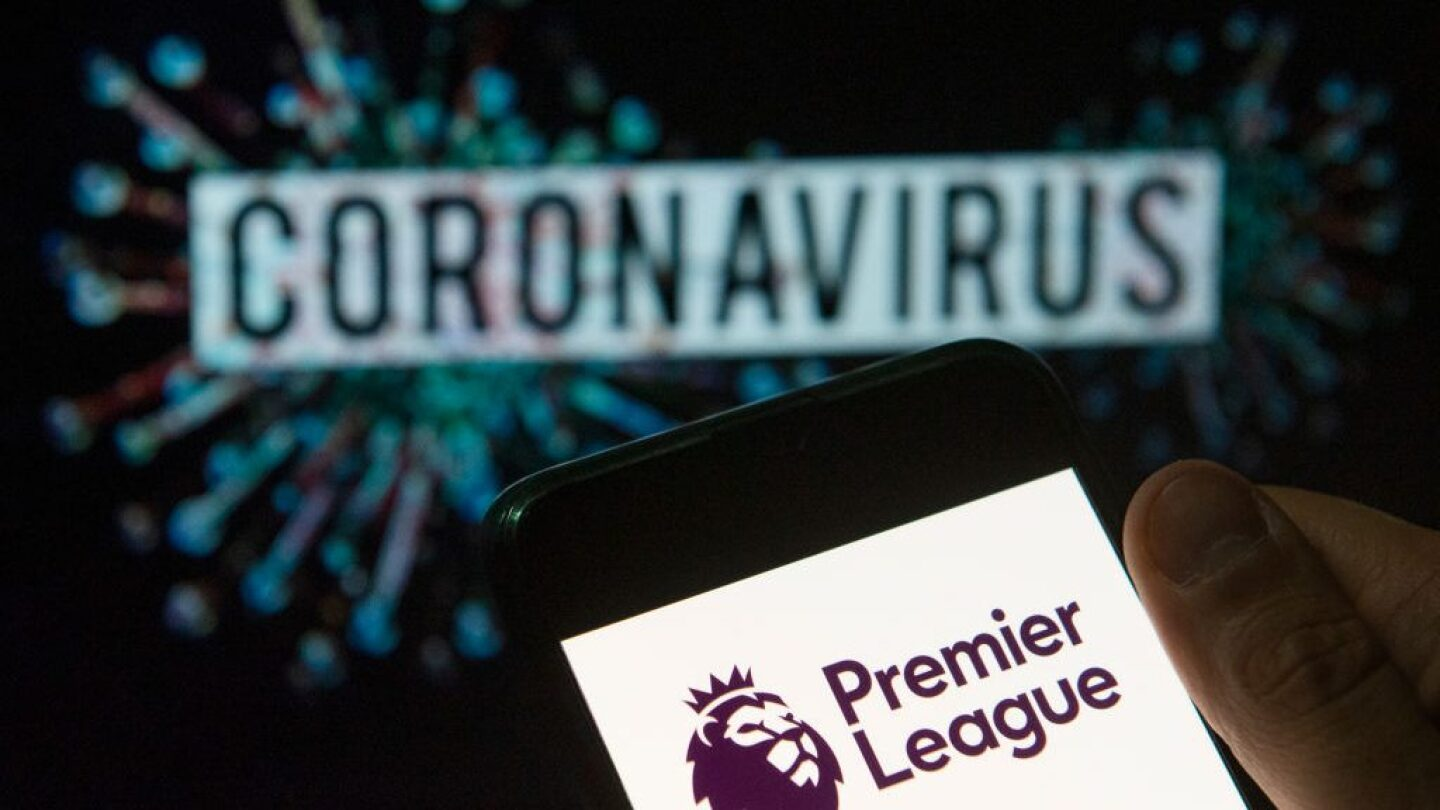